### Helpers

In [194]:
#Packages for NLP
import numpy as np
from tqdm import tqdm
import pandas as pd
import json
import string
import nltk
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from textblob import TextBlob
from textblob import Word

nlp = spacy.load("en_core_web_sm")

In [3]:
#Define stopwords
punctuation = "".join([symbol for symbol in string.punctuation if symbol not in ["'", '"']])
punctuation += '–'

stopwords_list = stopwords.words('english')
stopwords_list += list(punctuation)

In [5]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def concat_songs(list_lyrics):
    combo = ' '.join(lyric for lyric in list_lyrics)
    return combo

In [70]:
def get_tokens(songs, remove_stop_words=True):
    """Splits a string of text into individual words"""
    #remove stop words
    stop_words = set(stopwords_list) if remove_stop_words else []
    #tokenize
    words = [x for x in songs.split() if x not in stop_words]
    words = ['N-Word' if x in ['nigga', 'niggas','n*gga','n*ggas'] else x for x in words]
    return words

In [205]:
#replace in' with ing
def replace_contraction(list_lyrics):
    result = []
    for lyric in list_lyrics:
        result.append(lyric.replace("in\'","ing"))
    return result

In [93]:
def lem_words(list_of_tokens,lemmatizer):
    """
    lem_words(list_of_tokens, lemmatizer):
    Returns the lemmas of each token
    Params:
        list_of_tokens: list of words (tokens) from a single review
        lemmatizer: instance of the NLTK lemmatizer class
    Returns:
        a string of lemmas that comprise a review
    """
    wrd_list = [lemmatizer.lemmatize(word) for word in list_of_tokens]
    # join the individual lemmas into a single string
    return wrd_list

## Importing DFs

In [10]:
#Load in a Dataframe all lyrics and artist names
tracks_df = pd.read_pickle('../Data-Cleaning/working_data.pkl')

In [11]:
print(tracks_df.shape)
tracks_df.head()

(27514, 31)


,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release,Cleaned_lyrics,Lyric_words,Language
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...,Time to Chill,266040,24,79,"He's The DJ, I'm The Rapper",...,0.00172,0.000020,0.0648,0.887,170.385,4,1988,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...",en
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ...",Candy (feat. Trippie Redd),156719,78,79,Hotel Diablo,...,0.00829,0.000000,0.1820,0.480,98.019,4,2019,haha big 14 you know what the fuck going on ...,"[haha, big, 14, you, know, what, the, fuck, go...",en
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...,You Ain't a Killer,254866,57,79,Capital Punishment (Explicit Version),...,0.13400,0.000000,0.1120,0.745,90.945,4,1998,the harsh realities of life have taken toll ev...,"[the, harsh, realities, of, life, have, taken,...",en
6,Das EFX,Buck-Buck,Hold It Down,1995-09-26,*Skoob and Dray giving shoutouts*\n\nChorus:\n...,Buck-Buck,193626,22,78,Hold It Down,...,0.29300,0.000000,0.2950,0.531,95.677,4,1995,skoob and dray giving shoutouts chorus well ...,"[skoob, and, dray, giving, shoutouts, chorus, ...",en
9,Kool Moe Dee,To the Beat Y’all,Funke Funke Wisdom,1991-06-11,To the beat...\n\n(To the beat y'all\nTo the b...,To The Beat Y'All,201266,11,77,"Funke, Funke Wisdom",...,0.01930,0.000107,0.3950,0.578,108.597,4,1991,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...",en


In [12]:
#Load in a Dataframe all lyrics by artist names
artists_df = pd.read_pickle('../Data-Cleaning/artist_data.pkl')

In [13]:
print(artists_df.shape)
artists_df.head()

(277, 3)


,Artist,Cleaned_lyrics,Number_songs
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59


In [14]:
#Load in a Dataframe all lyrics by release year
year_df = pd.read_pickle('../Data-Cleaning/year_data.pkl')

In [15]:
print(year_df.shape)
year_df.head()

(32, 3)


,Year_release,Cleaned_lyrics,Number_songs
10,1988,[for years i have been waitin and hesitatin to...,87
11,1989,[yo this one aight though yo me and cool v dis...,118
12,1990,[ah and we do it like this ah and we do it lik...,104
13,1991,[to the beat to the beat y'all to the beat y'...,182
14,1992,[hello is anybody out there alright well check...,159


## EDA for artists

In [ ]:
#total words for each artist
#unique words for each artist
#words frequency
#word clouts
#worlds per songs average
#unique words per sonfs
#TF-IDF
#LDA

In [156]:
#create a column with all the lyrics
artists_df['all_Lyrics'] = artists_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [157]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,Count_words
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,391433
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,159012
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,691936
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,420433
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,170070


In [158]:
#tokenize the lyrics
artists_df['tokens_w_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
artists_df['tokens_w_out_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [163]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fuckin', kitche...","[go, hard, mother, fuckin', kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelin's, she, got, me, in, my, feeli...","[feelin's, got, feelin's, got, feelin's, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y..."


In [206]:
#replace in' with ing and remove 's
artists_df['tokens_w_stpw'] = artists_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
artists_df['tokens_w_out_stpw'] = artists_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))

In [207]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y..."


In [ ]:
#Lemmatize

In [203]:
replace_contraction(artists_df.tokens_w_out_stpw[0])

['go',
 'hard',
 'mother',
 'fucking',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'N-Word',
 "i'm",
 'pitchin',
 'hit',
 'soda',
 'make',
 'N-Word',
 'start',
 'whipping',
 'hit',
 'choppa',
 'make',
 'N-Word',
 'start',
 'flipping',
 'go',
 'hard',
 'mother',
 'fucking',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'N-Word',
 "i'm",
 'pitchin',
 'hit',
 'soda',
 'make',
 'N-Word',
 'start',
 'whipping',
 'hit',
 'choppa',
 'make',
 'N-Word',
 'start',
 'flipping',
 'go',
 'hard',
 'mother',
 'fuckin',
 'kitchen',
 'using',
 'baby',
 'bottles',
 'lean',
 'wifey',
 'say',
 "i'm",
 'trippin',
 'plus',
 'got',
 'maybelline',
 'smeared',
 'right',
 'zipper',
 'i’m',
 'kama',
 'sutra',
 'reader',
 'conjure',
 'drinker',
 'hot',
 'stove',
 'smoking',
 'like',
 'reefer',
 'work',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'ho',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'blow',
 'strong',
 'that’s',
 'weaker',
 'wait',
 'status',
 'change',
 'weight',
 'waiti

In [ ]:
#count the words for the entire lyrics
artists_df['Count_words'] = artists_df.all_Lyrics.apply(lambda x: len(x))

In [ ]:
#unique words for each artist

In [ ]:
#normalize total words and unique words taking in account number of songs

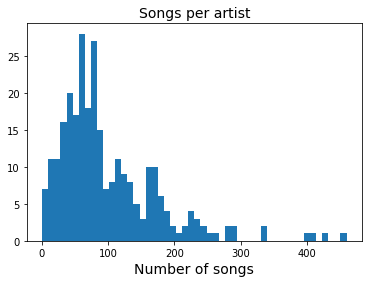

In [31]:
# How many songs do I have for each artist?
plt.hist(artists_df.Number_songs,bins=50)
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

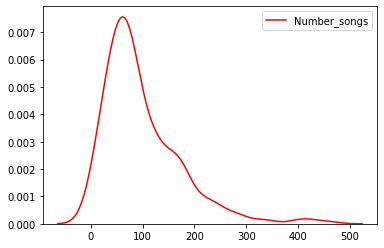

In [32]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [52]:
test = concat_songs(artists_df.Cleaned_lyrics[1])

In [88]:
len(test)

159012

In [139]:
test

'in my feelin\'s she got me in my feelin\'s she got me in my feelin\'s forreal she got me in my feelin\'s forreal got me in my feelin\' forreal she got me in my feelin\'s forreal she got me in my feelin\'s forreal got me   she got me in my feelin\'s forreal buy a brand new bentley forreal buy her new chanel forreal i don\'t kiss and tell no her diamonds raindrop yeah stay down when the fame stop yeah she be scratchin\' on my tank top real niggas \'gone make the pain stop baby is you gone ride with me \'till the wheels off 21 baby you \'gone calm me down when i\'m pissed off 21 i\'m a savage so your panties might get ripped off take \'em off your ex didn\'t know how to appreciate you now he missed out   we got somethin\' special we got somethin\' special we got somethin\' special we got somethin\' special i was finna text you but i ain\'t wanna pest you even if we ain\'t together no matter we\'re forever i\'m still comin\' to your rescue   put you in that coupe put you in jimmy choo 21 

In [131]:
get_tokens(test,remove_stop_words=False)

['in',
 'my',
 "feelin's",
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'got',
 'me',
 'in',
 'my',
 "feelin'",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'got',
 'me',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'buy',
 'a',
 'brand',
 'new',
 'bentley',
 'forreal',
 'buy',
 'her',
 'new',
 'chanel',
 'forreal',
 'i',
 "don't",
 'kiss',
 'and',
 'tell',
 'no',
 'her',
 'diamonds',
 'raindrop',
 'yeah',
 'stay',
 'down',
 'when',
 'the',
 'fame',
 'stop',
 'yeah',
 'she',
 'be',
 "scratchin'",
 'on',
 'my',
 'tank',
 'top',
 'real',
 'N-Word',
 "'gone",
 'make',
 'the',
 'pain',
 'stop',
 'baby',
 'is',
 'you',
 'gone',
 'ride',
 'with',
 'me',
 "'till",
 'the',
 'wheels',
 'off',
 '21',
 'baby',
 'you',
 "'gone",
 'calm',
 'me',
 'down',
 'when',

In [75]:
test_2 = get_tokens(test,remove_stop_words=False)

In [81]:
test_2

['in',
 'my',
 "feelin's",
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'got',
 'me',
 'in',
 'my',
 "feelin'",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'got',
 'me',
 'she',
 'got',
 'me',
 'in',
 'my',
 "feelin's",
 'forreal',
 'buy',
 'a',
 'brand',
 'new',
 'bentley',
 'forreal',
 'buy',
 'her',
 'new',
 'chanel',
 'forreal',
 'i',
 "don't",
 'kiss',
 'and',
 'tell',
 'no',
 'her',
 'diamonds',
 'raindrop',
 'yeah',
 'stay',
 'down',
 'when',
 'the',
 'fame',
 'stop',
 'yeah',
 'she',
 'be',
 "scratchin'",
 'on',
 'my',
 'tank',
 'top',
 'real',
 'N-Word',
 "'gone",
 'make',
 'the',
 'pain',
 'stop',
 'baby',
 'is',
 'you',
 'gone',
 'ride',
 'with',
 'me',
 "'till",
 'the',
 'wheels',
 'off',
 '21',
 'baby',
 'you',
 "'gone",
 'calm',
 'me',
 'down',
 'when',

In [176]:
doc=test.replace("\'", '')

In [177]:
doc

'in my feelins she got me in my feelins she got me in my feelins forreal she got me in my feelins forreal got me in my feelin forreal she got me in my feelins forreal she got me in my feelins forreal got me   she got me in my feelins forreal buy a brand new bentley forreal buy her new chanel forreal i dont kiss and tell no her diamonds raindrop yeah stay down when the fame stop yeah she be scratchin on my tank top real niggas gone make the pain stop baby is you gone ride with me till the wheels off 21 baby you gone calm me down when im pissed off 21 im a savage so your panties might get ripped off take em off your ex didnt know how to appreciate you now he missed out   we got somethin special we got somethin special we got somethin special we got somethin special i was finna text you but i aint wanna pest you even if we aint together no matter were forever im still comin to your rescue   put you in that coupe put you in jimmy choo 21 birkin bag yeah twentyfive thousand on the tag yeah 

In [175]:
doc

['feelins',
 'got',
 'feelins',
 'got',
 'feelins',
 'forreal',
 'got',
 'feelins',
 'forreal',
 'got',
 'feelin',
 'forreal',
 'got',
 'feelins',
 'forreal',
 'got',
 'feelins',
 'forreal',
 'got',
 'got',
 'feelins',
 'forreal',
 'buy',
 'brand',
 'new',
 'bentley',
 'forreal',
 'buy',
 'new',
 'chanel',
 'forreal',
 'dont',
 'kiss',
 'tell',
 'diamonds',
 'raindrop',
 'yeah',
 'stay',
 'fame',
 'stop',
 'yeah',
 'scratchin',
 'tank',
 'top',
 'real',
 'N-Word',
 'gone',
 'make',
 'pain',
 'stop',
 'baby',
 'gone',
 'ride',
 'till',
 'wheels',
 '21',
 'baby',
 'gone',
 'calm',
 'im',
 'pissed',
 '21',
 'im',
 'savage',
 'panties',
 'might',
 'get',
 'ripped',
 'take',
 'em',
 'ex',
 'didnt',
 'know',
 'appreciate',
 'missed',
 'got',
 'somethin',
 'special',
 'got',
 'somethin',
 'special',
 'got',
 'somethin',
 'special',
 'got',
 'somethin',
 'special',
 'finna',
 'text',
 'aint',
 'wanna',
 'pest',
 'even',
 'aint',
 'together',
 'matter',
 'forever',
 'im',
 'still',
 'comin',
 '

In [178]:
doc=nlp(doc)

In [191]:
list_test = []
for token in doc:
    list_test.append(lemmatize(token))

NameError: name 'lemmatize' is not defined

In [189]:
list_test

['in',
 '-PRON-',
 'feelin',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 'get',
 '-PRON-',
 '  ',
 '-PRON-',
 'get',
 '-PRON-',
 'in',
 '-PRON-',
 'feelin',
 'forreal',
 'buy',
 'a',
 'brand',
 'new',
 'bentley',
 'forreal',
 'buy',
 '-PRON-',
 'new',
 'chanel',
 'forreal',
 'i',
 'do',
 'not',
 'kiss',
 'and',
 'tell',
 'no',
 '-PRON-',
 'diamond',
 'raindrop',
 'yeah',
 'stay',
 'down',
 'when',
 'the',
 'fame',
 'stop',
 'yeah',
 '-PRON-',
 'be',
 'scratchin',
 'on',
 '-PRON-',
 'tank',
 'top',
 'real',
 'nigga',
 'go',
 'make',
 'the',
 'pain',
 'stop',
 'baby',
 'be',
 '-PRON-',
 'go',
 'ride',
 'with',
 '-PRON-',
 'till',
 'th

In [73]:
len(word_tokenize(test))

34579

In [55]:
len(set(word_tokenize(test)))

3037

In [ ]:
# iterate through the csv file 
val = [] 
      
    # typecaste each val to string 
for x in df.CONTENT:
    val.append(str(x))

In [ ]:
val

In [ ]:
# split the value 
tokens=[]
for x in val:
    tokens += x.split()

In [ ]:
tokens

In [ ]:
len(tokens)

In [ ]:
# Converts each token into lowercase 
tokenss = []
for val in tokens:
        tokenss.append(val.lower())

In [ ]:
tokenss

In [ ]:
for words in tokenss: 
    comment_words = comment_words + words + ' '

In [105]:
comment_words = 'test test fine whtever'

In [ ]:
len(comment_words)

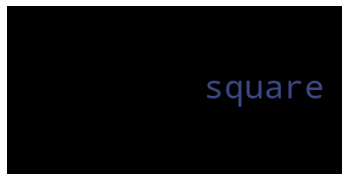

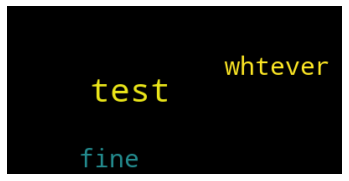

In [116]:
# Generate a word cloud image
# wordcloud = WordCloud().generate(comment_words)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(comment_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

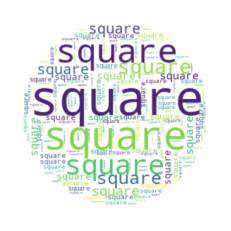

In [113]:
text = "square"

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="gaussian")
plt.show()

In [ ]:
!pip install spacy

In [120]:
# !pip install spacy

import spacy

# in your terminal, specifically your repo enter:
# "python -m spacy download en"

In [ ]:
!python -m spacy download en

In [121]:
sp = spacy.load('en')

In [122]:
sp = spacy.load('en')
#the sentence is your document tokens
sentence6 = sp(u'something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count went')

In [130]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.lemma_)

Apple
be
look
at
buy
U.K.
startup
for
$
1
billion


In [ ]:
#this is just a test to see if it works
for word in sentence6:
    print(word.text,  word.lemma_)

In [ ]:
#Looking at the distribution
plt.style.use('ggplot')
tracks_df.speechiness.hist()
plt.show()